# Phase 1 Project Data Cleaning, Exploration and Visualizations


# 1) Imports


In [2]:
# Import standard packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

# 2) Data Cleaning

## Load DataFrame with Sales Figures & Production Costs

In [3]:
# Load data file.
df = pd.read_csv('tn.movie_budgets.csv')

# Remove "$" and "," from production_budget columns & convert to millions.
df['production_budget'] = df['production_budget'].str.replace(' ', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str[:-6]

# Remove "$" and "," from domestic_gross columns & convert to millions.
df['domestic_gross'] = df['domestic_gross'].str.replace(' ', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str[:-6]

# Remove "$" and "," from worldwide_gross columns & convert to millions.
df['worldwide_gross'] = df['worldwide_gross'].str.replace(' ', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str[:-6]

# Filter blank strings.
df = df[df.production_budget != '']
df = df[df.worldwide_gross != '']
df = df[df.domestic_gross != '']

# Change figures from str to int class type.
df['production_budget'] = df['production_budget'].astype(int)
df['domestic_gross'] = df['domestic_gross'].astype(int)
df['worldwide_gross'] = df['worldwide_gross'].astype(int)

# Create international_gross col.
df['international_gross'] = df['worldwide_gross'] - df['domestic_gross']

# Filter international_gross.
df = df[df.international_gross != 0]

# Confirm.
df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,18-Dec-09,Avatar,425,760,2776,2016
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804
2,3,7-Jun-19,Dark Phoenix,350,42,149,107
3,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317,620,1316,696
...,...,...,...,...,...,...,...
5242,43,3-Aug-05,Junebug,1,2,3,1
5243,44,1-Aug-08,Frozen River,1,2,6,4
5244,45,21-Nov-01,Sidewalks of New York,1,2,3,1
5246,47,29-Sep-00,The Broken Hearts Club: A Romantic Comedy,1,1,2,1


## Load DataFrame with Genre Data

In [4]:
# Load genre file.
genre_df = pd.read_csv('tmdb.movies.csv')

# Filter to relevant columns.
genre_df = genre_df[['genre_ids', 'title']]

# Replace genre id with corresponding genre.
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('12', 'adventure')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('14', 'fantasy')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('16', 'animation')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('18', 'drama')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('27', 'horror')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('28', 'action')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('35', 'comedy')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('36', 'history')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('37', 'western')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('53', 'thriller')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('80', 'crime')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('99', 'documentary')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('878', 'sci-fi')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('9648', 'mystery')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10402', 'music')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10749', 'romance')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10751', 'family')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10752', 'war')
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace('10770', 'tv movie')

# Confirm changes.
genre_df

,genre_ids,title
0,"[adventure, fantasy, family]",Harry Potter and the Deathly Hallows: Part 1
1,"[fantasy, adventure, animation, family]",How to Train Your Dragon
2,"[adventure, action, sci-fi]",Iron Man 2
3,"[animation, comedy, family]",Toy Story
4,"[action, sci-fi, adventure]",Inception
...,...,...
26512,"[horror, drama]",Laboratory Conditions
26513,"[drama, thriller]",_EXHIBIT_84xxx_
26514,"[fantasy, action, adventure]",The Last One
26515,"[family, adventure, action]",Trailer Made


## Create New List that Contains Movies Found in Both DataFrames

In [5]:
# Create list for with same title for merging.
same_title_list = []

#convert both title columns to lists for conversion later.
genre_title_list = genre_df['title'].tolist()
gross_title_list = df['movie'].tolist()

# Create duplicate title list.
for title in genre_title_list:
    for movie in gross_title_list:
        if title == movie:
            same_title_list.append(title)
        else:
            continue

# Print current list length.
print("Orignal list count: " + str(len(same_title_list)))

# Remove duplicates from list.
same_title_list = list(dict.fromkeys(same_title_list))

# Print new list length.
print("New list count: " + str(len(same_title_list)))

Orignal list count: 1565
New list count: 1276


## Reduce Genre DataFrame to Movies Found in Both DataFrames

In [6]:
# Reduce to genre_df to movies found in both dataframes.
genre_df = genre_df[genre_df['title'].isin(same_title_list)]

# Confirm changes.
genre_df

,genre_ids,title
1,"[fantasy, adventure, animation, family]",How to Train Your Dragon
2,"[adventure, action, sci-fi]",Iron Man 2
3,"[animation, comedy, family]",Toy Story
4,"[action, sci-fi, adventure]",Inception
5,"[adventure, fantasy, family]",Percy Jackson & the Olympians: The Lightning T...
...,...,...
26323,[],The Box
26339,"[documentary, documentary]",The Judge
26413,[horror],Wolf
26425,[music],The Box


## Reduce Sales/Production DataFrame to Movies Found in Both DataFrames

In [7]:
# Reduce to df to movies found in both dataframes
df = df[df['movie'].isin(same_title_list)]

# Confirm changes
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,18-Dec-09,Avatar,425,760,2776,2016
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804
3,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944
6,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370
8,9,17-Nov-17,Justice League,300,229,655,426
...,...,...,...,...,...,...,...
5230,31,25-Sep-15,The Green Inferno,1,7,12,5
5231,32,3-Feb-17,I Am Not Your Negro,1,7,9,2
5232,33,19-Oct-12,The Sessions,1,6,11,5
5241,42,21-Oct-11,Martha Marcy May Marlene,1,2,5,3


## Clean Column Titles for Merging

In [8]:
# Rename genre_df 'title' column to 'movie in prep for merge
genre_df = genre_df.rename(columns={'title' : 'movie'})

# Confirm changes
print(genre_df.head())
df

                                 genre_ids  \
1  [fantasy, adventure, animation, family]   
2              [adventure, action, sci-fi]   
3              [animation, comedy, family]   
4              [action, sci-fi, adventure]   
5             [adventure, fantasy, family]   

                                               movie  
1                           How to Train Your Dragon  
2                                         Iron Man 2  
3                                          Toy Story  
4                                          Inception  
5  Percy Jackson & the Olympians: The Lightning T...  


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,18-Dec-09,Avatar,425,760,2776,2016
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804
3,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944
6,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370
8,9,17-Nov-17,Justice League,300,229,655,426
...,...,...,...,...,...,...,...
5230,31,25-Sep-15,The Green Inferno,1,7,12,5
5231,32,3-Feb-17,I Am Not Your Negro,1,7,9,2
5232,33,19-Oct-12,The Sessions,1,6,11,5
5241,42,21-Oct-11,Martha Marcy May Marlene,1,2,5,3


## Merge Data Frames

In [9]:
# Merge dataframes into one dataframe, "merged_df".
merged_df = pd.merge(df, genre_df, on = 'movie', how = 'outer')

# Print new dataframe length.
print("Combined DataFrame length is: " + str(len(merged_df)))

Combined DataFrame length is: 1565


In [10]:
# Drop duplicates.
merged_df.drop_duplicates(subset = 'movie', keep = False, inplace = True)

# Confirm results.
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,genre_ids
0,1,18-Dec-09,Avatar,425,760,2776,2016,"[action, adventure, fantasy, sci-fi]"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804,"[adventure, action, fantasy]"
2,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944,"[action, adventure, sci-fi]"
3,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370,"[adventure, action, fantasy]"
8,11,20-Jul-12,The Dark Knight Rises,275,448,1084,636,"[action, crime, drama, thriller]"
...,...,...,...,...,...,...,...,...
1557,29,20-Jul-18,Unfriended: Dark Web,1,8,16,8,[horror]
1558,31,25-Sep-15,The Green Inferno,1,7,12,5,"[action, adventure, horror, thriller]"
1559,32,3-Feb-17,I Am Not Your Negro,1,7,9,2,[documentary]
1560,33,19-Oct-12,The Sessions,1,6,11,5,"[drama, romance, comedy]"


## Load Nick's DataFrame Which Combined Ours Together

In [11]:
# Load file.
fnl_df = pd.read_csv('master_data_raw.csv')

# Select relevant columns for data exploration.
fnl_df = fnl_df[['movie_CH', 'production_budget_CH', 'domestic_gross_CH', 'worldwide_gross_CH', 'international_gross', 'release_date',
                 'runtime_minutes', 'studio', 'genres', 'Action',
                 'Animation', 'Comedy','Family']]

# Test.
fnl_df

,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,release_date,runtime_minutes,studio,genres,Action,Animation,Comedy,Family
0,NaN,NaN,NaN,NaN,NaN,12/31/2012,91.0,NaN,"Action,Animation,Comedy",True,True,True,False
1,NaN,NaN,NaN,NaN,NaN,8/18/1995,NaN,NaN,"Action,Adventure,Fantasy",True,False,False,False
2,NaN,NaN,NaN,NaN,NaN,6/19/2015,88.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3/22/2013,124.0,IFC,"Adventure,Drama,Romance",False,False,False,False
4,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,12/25/2013,114.0,Fox,"Adventure,Comedy,Drama",False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,NaN,NaN,NaN,NaN,NaN,9/20/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3893,NaN,NaN,NaN,NaN,NaN,4/21/2017,NaN,NaN,Drama,False,False,False,False
3894,NaN,NaN,NaN,NaN,NaN,3/13/2007,NaN,NaN,Documentary,False,False,False,False
3895,NaN,NaN,NaN,NaN,NaN,8/4/2017,85.0,NaN,Comedy,False,False,True,False


In [12]:
# Drop NaN & duplicates
fnl_df.dropna(axis=0, how = 'any', inplace=True)
fnl_df.drop_duplicates(subset = 'movie_CH', keep = False, inplace = True)

# Add profit column
fnl_df['profit'] = fnl_df['worldwide_gross_CH'] - fnl_df['production_budget_CH']

# Remove unused genres for graphing purposes.
fnl_df['genres'] = fnl_df['genres'].str.replace('Adventure', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Horror', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Mystery', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Thriller', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Musical', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Romance', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Fantasy', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('War', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Sci-Fi', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Western', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Drama', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Music', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Documentary', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Biography', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Sport', '')
fnl_df['genres'] = fnl_df['genres'].str.replace('Crime', '')
fnl_df['genres'] = fnl_df['genres'].str.replace(',', '')

# Confirm Results.
fnl_df

,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,release_date,runtime_minutes,studio,genres,Action,Animation,Comedy,Family,profit
4,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,12/25/2013,114.0,Fox,Comedy,False,False,True,False,96.0
5,A Walk Among the Tombstones,28.0,26.0,62.0,36.0,9/19/2014,114.0,Uni.,Action,True,False,False,False,34.0
6,Jurassic World,215.0,652.0,1648.0,996.0,6/12/2015,124.0,Uni.,Action,True,False,False,False,1433.0
7,The Rum Diary,45.0,13.0,21.0,8.0,10/28/2011,119.0,FD,Comedy,False,False,True,False,-24.0
8,The Three Stooges,30.0,44.0,54.0,10.0,4/13/2012,92.0,Fox,ComedyFamily,False,False,True,True,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,Uncle Drew,18.0,42.0,46.0,4.0,6/29/2018,103.0,LG/S,Comedy,False,False,True,False,28.0
3523,BlacKkKlansman,15.0,49.0,93.0,44.0,8/10/2018,135.0,Focus,,False,False,False,False,78.0
3534,"Paul, Apostle of Christ",5.0,17.0,25.0,8.0,3/23/2018,108.0,Affirm,,False,False,False,False,20.0
3541,Instant Family,48.0,67.0,119.0,52.0,11/16/2018,118.0,Par.,Comedy,False,False,True,False,71.0


# 2) Data Exploration

## Set Up DataFrames by Genre (Animation)

In [13]:
# Set up new df for genre.
action_df = fnl_df[(fnl_df['Action'] == True) & (fnl_df['Animation'] != True)]

# Establish new data points for genre. 
action_movies = len(action_df)
action_prod = sum(action_df['production_budget_CH'])
action_salesd = sum(action_df['domestic_gross_CH']) 
action_salesw = sum(action_df['worldwide_gross_CH'])
action_salesi = sum(action_df['international_gross'])
total_action_profit = action_salesw - action_prod
film_action_profit = total_action_profit / action_movies

print(f' Average profit per Action film is roughly {round(film_action_profit)}M' )

 Average profit per Action film is roughly 192M


In [14]:
# Set up new df for genre
a_action_df = fnl_df[(fnl_df['Action'] == True) & (fnl_df['Animation'] == True)]

# Establish new data points for genre 
a_action_movies = len(a_action_df)
a_action_prod = sum(a_action_df['production_budget_CH'])
a_action_salesd = sum(a_action_df['domestic_gross_CH']) 
a_action_salesw = sum(a_action_df['worldwide_gross_CH'])
a_action_salesi = sum(a_action_df['international_gross'])
a_total_action_profit = a_action_salesw - a_action_prod
a_film_action_profit = a_total_action_profit / a_action_movies

print(f' Average profit per Animated Action film is roughly {round(a_film_action_profit)}M' )

 Average profit per Animated Action film is roughly 328M


In [15]:
# Set up new df for genre
animation_df = fnl_df[(fnl_df['Animation'] == True)]

# Establish new data points for genre 
animation_movies = len(animation_df)
animation_prod = sum(animation_df['production_budget_CH'])
animation_salesd = sum(animation_df['domestic_gross_CH']) 
animation_salesw = sum(animation_df['worldwide_gross_CH'])
animation_salesi = sum(animation_df['international_gross'])
total_animation_profit = animation_salesw - animation_prod
film_animation_profit = total_animation_profit / animation_movies

print(f' Average profit per Animated film is roughly {round(film_animation_profit)}M' )

 Average profit per Animated film is roughly 300M


In [16]:
# Set up new df for genre
comedy_df = fnl_df[(fnl_df['Comedy'] == True) & (fnl_df['Animation'] != True)]

# Establish new data points for genre 
comedy_movies = len(comedy_df)
comedy_prod = sum(comedy_df['production_budget_CH'])
comedy_salesd = sum(comedy_df['domestic_gross_CH']) 
comedy_salesw = sum(comedy_df['worldwide_gross_CH'])
comedy_salesi = sum(comedy_df['international_gross'])
total_comedy_profit = comedy_salesw - comedy_prod
film_comedy_profit = total_comedy_profit / comedy_movies

print(f' Average profit per Comedy film is roughly {round(film_comedy_profit)}M' )

 Average profit per Comedy film is roughly 76M


In [17]:
# Set up new df for genre
a_comedy_df = fnl_df[(fnl_df['Comedy'] == True) & (fnl_df['Animation'] == True)]

# Establish new data points for genre 
a_comedy_movies = len(a_comedy_df)
a_comedy_prod = sum(a_comedy_df['production_budget_CH'])
a_comedy_salesd = sum(a_comedy_df['domestic_gross_CH']) 
a_comedy_salesw = sum(a_comedy_df['worldwide_gross_CH'])
a_comedy_salesi = sum(a_comedy_df['international_gross'])
a_total_comedy_profit = a_comedy_salesw - a_comedy_prod
a_film_comedy_profit = a_total_comedy_profit / a_comedy_movies

print(f' Average profit per Animated Comedy film is roughly {round(a_film_comedy_profit)}M' )

 Average profit per Animated Comedy film is roughly 294M


In [18]:
# Set up new df for genre
family_df = fnl_df[(fnl_df['Family'] == True) & (fnl_df['Animation'] != True)]

# Establish new data points for genre 
family_movies = len(family_df)
family_prod = sum(family_df['production_budget_CH'])
family_salesd = sum(family_df['domestic_gross_CH']) 
family_salesw = sum(family_df['worldwide_gross_CH'])
family_salesi = sum(family_df['international_gross'])
total_family_profit = family_salesw - family_prod
film_family_profit = total_family_profit / family_movies

print(f' Average profit per Family film is roughly {round(film_family_profit)}M' )

 Average profit per Family film is roughly 108M


In [19]:
# Set up new df for genre
a_family_df = fnl_df[(fnl_df['Family'] == True) & (fnl_df['Animation'] == True)]

# Establish new data points for genre 
a_family_movies = len(a_family_df)
a_family_prod = sum(a_family_df['production_budget_CH'])
a_family_salesd = sum(a_family_df['domestic_gross_CH']) 
a_family_salesw = sum(a_family_df['worldwide_gross_CH'])
a_family_salesi = sum(a_family_df['international_gross'])
a_total_family_profit = a_family_salesw - a_family_prod
a_film_family_profit = a_total_family_profit / a_family_movies

print(f' Average profit per Family film is roughly {round(a_film_family_profit)}M' )

 Average profit per Family film is roughly 208M


In [20]:
# Creating lists to store total movie values.
all_movies = [action_movies, comedy_movies, family_movies]
all_animated_movies = [a_action_movies, a_comedy_movies, a_family_movies]
all_profit = [total_action_profit, total_comedy_profit, total_family_profit]
all_animated_profit = [a_total_action_profit, a_total_comedy_profit, a_total_family_profit]

# Calculations for presentation.
total_movies = sum(all_movies)
total_animated_movies = sum(all_animated_movies)

total_movie_profit = sum(all_profit)
total_animated_profit = sum(all_animated_profit)

film_avg_profit = total_movie_profit / total_movies
a_film_avg_profit = total_animated_profit / total_animated_movies

avg_animated_profit_increase = a_film_avg_profit / film_avg_profit
avg_increase_per_film = a_film_avg_profit - film_avg_profit



# Looking at values.
print(f'Total movies that meet our criteria {total_movies+total_animated_movies}')
print(f'You can expect roughly {round(avg_animated_profit_increase, 2)} times more profit when animating (120% increase).')

Total movies that meet our criteria 607
You can expect roughly 2.2 times more profit when animating (120% increase).


# Foreign and Domestic Market Analysis

In [21]:
#let's load our cleaned data frame and looking at the rows and columns. 
#In this set we can see the columns associated with our variables in question. 

masterdf = pd.read_csv('master_data_raw.csv')
masterdf

,Unnamed: 0,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,...,Animation,averagerating,numvotes,release_date_CH,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,genre_ids
0,0,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,12/31/2012,...,True,1.9,8248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,8/18/1995,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,6/19/2015,...,NaN,7.5,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,3/22/2013,...,False,6.1,37886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,12/25/2013,...,False,7.3,275300.0,25-Dec-13,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,"[adventure, comedy, drama, fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,3892,trapped,tt9877596,Trapped,Trapped,2016,NaN,NaN,87,9/20/2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3893,3893,the promise,tt9889072,The Promise,The Promise,2017,NaN,Drama,78,4/21/2017,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,3894,sublime,tt9893078,Sublime,Sublime,2019,NaN,Documentary,30,3/13/2007,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3895,3895,columbus,tt9899880,Columbus,Columbus,2018,85.0,Comedy,93,8/4/2017,...,False,5.8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Let's now look at the data types associated with our domestic gross revenue, our foreign gross revenue, and our worldwide gross revenue

masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3897 non-null   int64  
 1   clean_title           3897 non-null   object 
 2   movie_id              3897 non-null   object 
 3   primary_title         3897 non-null   object 
 4   original_title        3896 non-null   object 
 5   start_year            3897 non-null   int64  
 6   runtime_minutes       3401 non-null   float64
 7   genres                3824 non-null   object 
 8   id                    3897 non-null   int64  
 9   release_date          3897 non-null   object 
 10  movie                 3897 non-null   object 
 11  production_budget     3897 non-null   int64  
 12  domestic_gross        3897 non-null   int64  
 13  worldwide_gross       3897 non-null   int64  
 14  foreign_gross         3897 non-null   int64  
 15  title                

In [23]:
#our selected release date is in object format...we want to change that to an integer, so we use the below setup
import datetime
masterdf['release_date'] = pd.DatetimeIndex(masterdf['release_date']).year
masterdf['release_date']

0       2012
1       1995
2       2015
3       2013
4       2013
        ... 
3892    2002
3893    2017
3894    2007
3895    2017
3896    2010
Name: release_date, Length: 3897, dtype: int64

# 3) Create Visuals

## Clean Genres Specific DataFrames for Visuals (Animation)

In [24]:
# Setting up columns for graphing.
family_df.loc[:,'genres'] = 'Family'
a_family_df.loc[:,'genres'] = 'Animation/Family'
comedy_df.loc[:,'genres'] = 'Comedy'
a_comedy_df.loc[:,'genres'] = 'Animation/Comedy'
action_df.loc[:,'genres'] = 'Action'
a_action_df.loc[:,'genres'] = 'Animated/Action'

C:\Users\helme\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [25]:
# Create copy of fnl_df for clean genres.
clean_genres_df = fnl_df.copy()

# Convert filtered dataframe data in tuples for cleaned genres.
cg_family = tuple(zip(family_df.movie_CH, family_df.genres))
cg_a_family = tuple(zip(a_family_df.movie_CH, a_family_df.genres))
cg_comedy = tuple(zip(comedy_df.movie_CH, comedy_df.genres))
cg_a_comedy = tuple(zip(a_comedy_df.movie_CH, a_comedy_df.genres))
cg_action = tuple(zip(action_df.movie_CH, action_df.genres))
cg_a_action = tuple(zip(a_action_df.movie_CH, a_action_df.genres))

# Combine tuples.
all_genres_tup = cg_family + cg_a_family + cg_comedy + cg_a_comedy + cg_action + cg_a_action

# Confirm results.
len(all_genres_tup)

607

In [26]:
# Create DataFrame with cleaned genres to be merged.
df_merge_genres = pd.DataFrame(list(all_genres_tup), columns=['movie_CH', 'genres'])

# Confirm results.
df_merge_genres

,movie_CH,genres
0,The Three Stooges,Family
1,Real Steel,Family
2,Furry Vengeance,Family
3,Ramona and Beezus,Family
4,Percy Jackson & the Olympians: The Lightning T...,Family
...,...,...
602,Kung Fu Panda 3,Animated/Action
603,The Lego Ninjago Movie,Animated/Action
604,Incredibles 2,Animated/Action
605,The Lego Batman Movie,Animated/Action


## Merge DataFrames For Visualizations (Animation)

In [27]:
# Merge DataFrames for boxplot.
fnl_merged_df = pd.merge(clean_genres_df, df_merge_genres, on = 'movie_CH', how = 'outer')

# Drop NaN.
fnl_merged_df.dropna(axis=0, how = 'any', inplace=True)

# Confirm we still have 607 movies.
fnl_merged_df

,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,release_date,runtime_minutes,studio,genres_x,Action,Animation,Comedy,Family,profit,genres_y
0,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,12/25/2013,114.0,Fox,Comedy,False,False,True,False,96.0,Comedy
1,A Walk Among the Tombstones,28.0,26.0,62.0,36.0,9/19/2014,114.0,Uni.,Action,True,False,False,False,34.0,Action
2,Jurassic World,215.0,652.0,1648.0,996.0,6/12/2015,124.0,Uni.,Action,True,False,False,False,1433.0,Action
3,The Rum Diary,45.0,13.0,21.0,8.0,10/28/2011,119.0,FD,Comedy,False,False,True,False,-24.0,Comedy
4,The Three Stooges,30.0,44.0,54.0,10.0,4/13/2012,92.0,Fox,ComedyFamily,False,False,True,True,24.0,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Green Book,23.0,85.0,322.0,237.0,11/16/2018,130.0,Uni.,Comedy,False,False,True,False,299.0,Comedy
828,A Simple Favor,20.0,53.0,97.0,44.0,9/14/2018,117.0,LGF,Comedy,False,False,True,False,77.0,Comedy
830,Destroyer,9.0,1.0,3.0,2.0,12/25/2018,121.0,Annapurna,Action,True,False,False,False,-6.0,Action
832,Uncle Drew,18.0,42.0,46.0,4.0,6/29/2018,103.0,LG/S,Comedy,False,False,True,False,28.0,Comedy


## Create Boxplot (Animation)

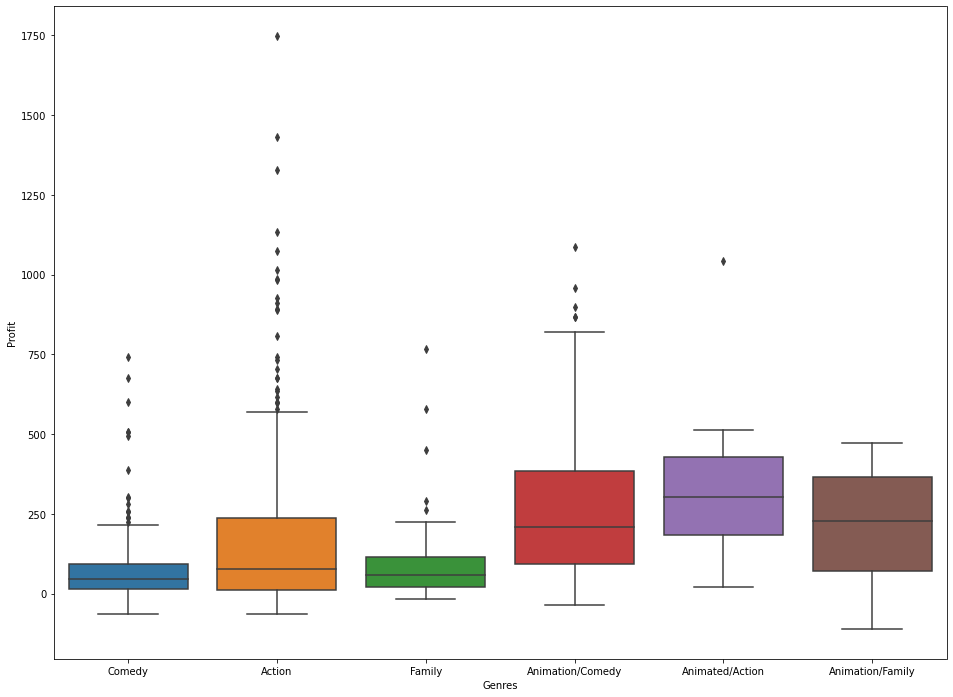

In [28]:
fnl_merged_df = fnl_merged_df.rename(columns={'genres_y':'Genres', 'profit':'Profit'})

fig, ax = plt.subplots(figsize=(16,12))

g = sns.boxplot(data=fnl_merged_df, x = 'Genres', y='Profit')

## Refine Boxplot for Presentation (Animation)

In [29]:
# Define function to determine outliers
def outliers(df, col):
    Q1= df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# Apply outlier function to 'Profit' data
upper, lower = outliers(fnl_merged_df, "Profit")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  456.25
Lower Whisker:  -245.75


In [30]:
# Filter outliers with function. Upper outliers are so high that none of the lower outliers are filtered with function
# so I manually adjust lower whisker to -100M 'Profit'
no_outlier_df = fnl_merged_df[(fnl_merged_df['Profit'] > -100) & (fnl_merged_df['Profit'] < upper)]

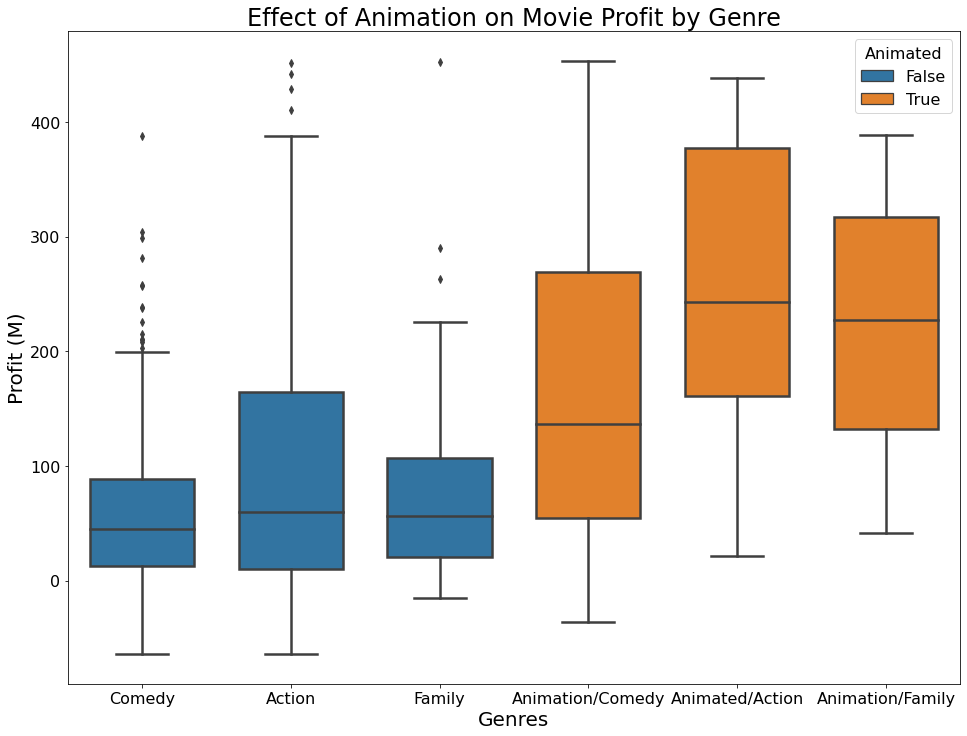

In [31]:
# Set up Boxplot dimensions
plt.rc('font', size=16)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

# Create Boxplot
fig, ax = plt.subplots(figsize=(16,12))

g = sns.boxplot(data=no_outlier_df, x = 'Genres', y='Profit', width=.7, linewidth=2.5, hue='Animation', dodge=False, )
ax.set_ylabel("Profit (M)")
plt.legend(title = "Animated")
plt.title('Effect of Animation on Movie Profit by Genre');

## Foreign vs Domestic Visuals

In [32]:
#now we want to create our visualizaiton to be filtered with years between 2014 and 2018
#we created the variable xrange in order to look at the years 2014 to 2018. 
#IMPORTANT: we chose this range of years because it allowed us to analyze the 2014 to 2018 
#we grabbing earnings from a time when streaming became a social norm, but also because 2014 was the beginning of when our potential competitor Netflix started their very own movie studio.

yr2014_yr2018 = masterdf[(masterdf['release_date'] >= 2014) & (masterdf['release_date'] <= 2018)]
xrange = yr2014_yr2018['release_date']
xrange

2       2015
5       2014
6       2015
17      2014
21      2015
        ... 
3883    2016
3885    2015
3890    2015
3893    2017
3895    2017
Name: release_date, Length: 1477, dtype: int64

In [33]:
#now we can analyze our data information associated with our specified time frame by calling .info()
yr2014_yr2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 2 to 3895
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1477 non-null   int64  
 1   clean_title           1477 non-null   object 
 2   movie_id              1477 non-null   object 
 3   primary_title         1477 non-null   object 
 4   original_title        1477 non-null   object 
 5   start_year            1477 non-null   int64  
 6   runtime_minutes       1356 non-null   float64
 7   genres                1457 non-null   object 
 8   id                    1477 non-null   int64  
 9   release_date          1477 non-null   int64  
 10  movie                 1477 non-null   object 
 11  production_budget     1477 non-null   int64  
 12  domestic_gross        1477 non-null   int64  
 13  worldwide_gross       1477 non-null   int64  
 14  foreign_gross         1477 non-null   int64  
 15  title                

In [34]:
#Let's specifically look at the foreign gross aspect of our data within this time frame
print(yr2014_yr2018['foreign_gross'])

2           56188
5        36090902
6       996584239
17       21449831
21         446787
          ...    
3883     98883179
3885       208672
3890     18986015
3893      2327129
3895        93404
Name: foreign_gross, Length: 1477, dtype: int64


Now it's time to do some Statistical Analysis associated with Foreign and Domestic Gross Reveues for our time frame. Let's begin with lookng at the mean. As you can see the mean for Foreign Gross Revenue is much higher than that of domestic

In [35]:
fogrssmn = yr2014_yr2018['foreign_gross'].sum()/5
dogrssmn = yr2014_yr2018['domestic_gross'].sum()/5

print(fogrssmn)
print(dogrssmn)

20393201726.4
13948292452.8


The mean only gives us some of the picture. To confirm that Foreign Gross revenue seems to be higher than domestic, let's look at the median to see if there were outliers that potentially skewed our data.

In [36]:
import statistics

yr2014 = masterdf[(masterdf['release_date'] == 2014)]
yr2015 = masterdf[(masterdf['release_date'] == 2015)]
yr2016 = masterdf[(masterdf['release_date'] == 2016)]               
yr2017 = masterdf[(masterdf['release_date'] == 2017)]
yr2018 = masterdf[(masterdf['release_date'] == 2018)]


yr2k14fs = yr2014['foreign_gross'].sum()
yr2k15fs = yr2015['foreign_gross'].sum()
yr2k16fs = yr2016['foreign_gross'].sum()
yr2k17fs = yr2017['foreign_gross'].sum()
yr2k18fs = yr2018['foreign_gross'].sum()

foreign_sums = [yr2k14fs, yr2k15fs, yr2k16fs, yr2k17fs, yr2k18fs]
foreign_median = statistics.median(foreign_sums)


yr2k14ds = yr2014['domestic_gross'].sum()
yr2k15ds = yr2015['domestic_gross'].sum()
yr2k16ds = yr2016['domestic_gross'].sum()
yr2k17ds = yr2017['domestic_gross'].sum()
yr2k18ds = yr2018['domestic_gross'].sum()

domestic_sums = [yr2k14ds, yr2k15ds, yr2k16ds, yr2k17ds, yr2k18ds]
domestic_median = statistics.median(domestic_sums)


print(foreign_median)
print(domestic_median)


18416412096
12736761698


It seems like our analysis holds! The foreign median definitely is greater than that of the domestic median. Let's add in our standard deviation to further analyze. 

In [37]:
fogrssstd = statistics.stdev(foreign_sums)
dogrssstd = statistics.stdev(domestic_sums)

print(fogrssstd)
print(dogrssstd)


343105386.8836856
347979795.93352


C:\Users\helme\anaconda3\envs\learn-env\lib\statistics.py:168: RuntimeWarning: overflow encountered in longlong_scalars
  partials[d] = partials_get(d, 0) + n
C:\Users\helme\anaconda3\envs\learn-env\lib\fractions.py:420: RuntimeWarning: overflow encountered in longlong_scalars
  return Fraction(a.numerator * db - b.numerator * da,


It seems like our analysis holds! The foreign median definitely is greater than that of the domestic median
#Let's add in our standard deviation to further analyze 


<ipython-input-39-616f55efc361>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = masterdf.groupby(xrange)['domestic_gross', 'foreign_gross'].sum().sort_values('release_date').plot.bar(stacked=False, title = 'Yearly Gross Earnings Foreign vs. Domestic', ylabel = 'Gross Revenue (B USD)', xlabel = 'Years', rot=0)


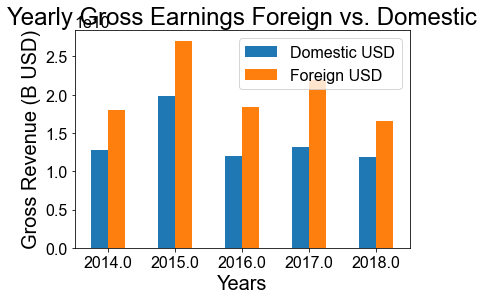

In [39]:
labels = ['2014', '2015', '2016', '2017', '2018']


ax = masterdf.groupby(xrange)['domestic_gross', 'foreign_gross'].sum().sort_values('release_date').plot.bar(stacked=False, title = 'Yearly Gross Earnings Foreign vs. Domestic', ylabel = 'Gross Revenue (B USD)', xlabel = 'Years', rot=0)

ax.legend(['Domestic USD', 'Foreign USD'])

sns.set_style('white')

Great! We clearly see a consistency with our mean an median predictions.As you can see in the figure, we can see the comparison of earnings between both markets all measured in the united states dollar.Foreign Markets seem to be a very lucrative entry point, and shouldn't be forgotten even in the early stages of starting a Movie Studio


# Appendix

## Recall Data for Possible Use in Presentation (Animation)

In [40]:
print(f'You can expect roughly {round(avg_animated_profit_increase, 2)} times more profit when animating ({round((avg_animated_profit_increase-1)*100, 2)}% increase).')
print(f'This comes to an average of ${round(avg_increase_per_film)}M more profit per film.')


You can expect roughly 2.2 times more profit when animating (119.53% increase).
This comes to an average of $160M more profit per film.


## Bonus Stats After Instructor Feedback on Slides (Animation)

In [41]:
# Check to make sure "fnl_merged_df" has 607 row and can still be used for calculations.
print(f' DataFrame still has {len(fnl_merged_df.index)} entries.')

# Calculate % of negative profit non-animated films from our set.
red_films = len(fnl_merged_df[(fnl_merged_df['Profit'] < 0) & (fnl_merged_df['Animation'] != True)])
red_film_rate = red_films / total_movies

# Calculate % of negative profit animated films from our set.
a_red_films = len(fnl_merged_df[(fnl_merged_df['Profit'] < 0) & (fnl_merged_df['Animation'] == True)])
a_red_film_rate = a_red_films / total_animated_movies

# Print results
print(f' Non-Animated films generate a loss rate of {round(red_film_rate,3)} or 12.1%')
print(f' Animated films generate a loss rate of {round(a_red_film_rate,3)} or 3.8%')
print(f' Non-Animated films are more than 3x more likely to generate a loss!')
print(f' The average Non-Animated profit is ${round(film_avg_profit)}M.')
print(f' The average Animated profit is ${round(a_film_avg_profit)}M.')

 DataFrame still has 607 entries.
 Non-Animated films generate a loss rate of 0.121 or 12.1%
 Animated films generate a loss rate of 0.038 or 3.8%
 Non-Animated films are more than 3x more likely to generate a loss!
 The average Non-Animated profit is $134M.
 The average Animated profit is $294M.
